In [0]:
# 구글 드라이브 colab과 연동
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

# 따릉이 데이터 
## 따릉이 데이터셋 정리 
- bike_hour.csv : 사용자 분류 및 이용내역
- bike_stat_2017_18.csv : 반납 대여에 관련된 정보
- seoulbike_rental_spotinfo.csv : 대여소를 구별로 분류해서 거치소 갯수를 확인. 
- weather.csv : 기상청 정보 (습도, 온도, 비, 등)
- dust.csv : 미세먼지 정보 ( pm25, pm10)

** 참고 : 오늘의 코드에서 진행한 따릉이 분석 내용을 많은부분 실습해보면서 데이터의 전반적인 특성을 확인해 봄. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sn

## 한글 폰트 설정을 해준다. 

In [0]:
import matplotlib.font_manager as fm
fontpath = 'C:/Windows/Fonts/gulim.ttc'

font = fm.FontProperties(fname=fontpath, size = 9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='gulim')

## 파일을 불러온다. 

In [0]:
# 거치소 정보 
data_d = pd.read_excel('D:/dev/dataAnaysis project/sharedbike/seoul bike/seoulbike_rental_spotinfo.xlsx', encoding='cp949')

In [0]:
# 이용자 내역 정보 
data = pd.read_csv('D:/dev/dataAnaysis project/sharedbike/seoul bike/bike_hour.csv',encoding='cp949')

In [0]:
data = data.apply(lambda x: x.str.strip("'") if x.dtype == np.dtype('object') else x)

In [0]:
data_d.head()

,구분,대여소번호,대여소명,위도,경도,거치대수
0,마포구,101,101. (구)합정동 주민센터,37.549561,126.905754,5
1,마포구,102,102. 망원역 1번출구 앞,37.556000,126.910454,20
2,마포구,103,103. 망원역 2번출구 앞,37.554951,126.910835,14
3,마포구,104,104. 합정역 1번출구 앞,37.550629,126.914986,13
4,마포구,105,105. 합정역 5번출구 앞,37.550007,126.914825,5


In [0]:
data_d.dtypes

구분        object
대여소번호      int64
대여소명      object
위도       float64
경도       float64
거치대수       int64
dtype: object

In [0]:
data = data.drop(['운동량','탄소량'], axis=1)

In [0]:
data.rename(columns={'대여일자':'date',
                     '대여시간':'time',
                     '성별': 'gender',
                     '연령대코드': 'age',
                     '이동거리(M)': 'distance',
                     '이동시간(분)': 'useTime',
                     '대여구분코드': 'code',
                     '이용건수': 'useCount',
                     '대여소번호': 'number',
                     '대여소':'rentplace'}, inplace=True)

In [0]:
data.head()

,date,time,number,place,code,gender,age,useCount,distance,useTime
0,2017-06-01,0.0,301,경복궁역 7번출구 앞,정기,F,20대,2.0,11640.0,98.0
1,2017-06-01,0.0,302,경복궁역 4번출구 뒤,정기,F,20대,1.0,2500.0,22.0
2,2017-06-01,0.0,326,안국역 5번출구 앞,정기,F,20대,1.0,640.0,4.0
3,2017-06-01,0.0,330,청계천 한빛광장,정기,F,20대,1.0,3340.0,21.0
4,2017-06-01,0.0,111,상수역 2번출구 앞,정기,F,20대,1.0,2000.0,11.0


In [0]:
data.tail()

,date,time,number,place,code,gender,age,useCount,distance,useTime
5475788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5475789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5475790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5475791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5475792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data.isnull().sum()

date         334864
time         334864
number      2264562
place        335272
code         334864
gender       454140
age          469976
useCount     334864
distance     334864
useTime      334864
dtype: int64

In [0]:
data.fillna(0, inplace=True)

In [0]:
data.isnull().sum()

date        0
time        0
number      0
place       0
code        0
gender      0
age         0
useCount    0
distance    0
useTime     0
dtype: int64

In [0]:
data['date'] = data.date.astype('category')
data['time'] = data.time.astype('category')
data['gender'] = data.gender.astype('category')
data['age'] = data.age.astype('category')
data['distance'] = data.distance.astype('category')
data['number'] = data.number.astype('category')
data['useTime'] = data.useTime.astype('category')
data['place'] = data.place.astype('category')
data['code'] = data.code.astype('category')
data['useCount'] = data.useCount.astype('category')

In [0]:
data.head()

,date,time,number,place,code,gender,age,useCount,distance,useTime
0,2017-06-01,0.0,301,경복궁역 7번출구 앞,정기,F,20대,2.0,11640.0,98.0
1,2017-06-01,0.0,302,경복궁역 4번출구 뒤,정기,F,20대,1.0,2500.0,22.0
2,2017-06-01,0.0,326,안국역 5번출구 앞,정기,F,20대,1.0,640.0,4.0
3,2017-06-01,0.0,330,청계천 한빛광장,정기,F,20대,1.0,3340.0,21.0
4,2017-06-01,0.0,111,상수역 2번출구 앞,정기,F,20대,1.0,2000.0,11.0


In [0]:
data[['useTime','distance']].describe()

,useTime,distance
count,5475793.0,5475793.0
unique,1264.0,10664.0
top,0.0,0.0
freq,348866.0,456397.0


In [0]:
data.isnull().any()

date        False
time        False
number      False
place       False
code        False
gender      False
age         False
useCount    False
distance    False
useTime     False
dtype: bool

In [0]:
data.isnull().sum()

date        0
time        0
number      0
place       0
code        0
gender      0
age         0
useCount    0
distance    0
useTime     0
dtype: int64

In [0]:
data = data.replace(' ', '')
data = data.replace('', np.nan)
data.fillna(0, inplace=True)

In [0]:
# 데이터의 총개수 확인
data.shape

(5475793, 10)

In [0]:
data.head(50)

,date,time,number,place,code,gender,age,useCount,distance,useTime
0,2017-06-01,0.0,301,경복궁역 7번출구 앞,정기,F,20대,2.0,11640.0,98.0
1,2017-06-01,0.0,302,경복궁역 4번출구 뒤,정기,F,20대,1.0,2500.0,22.0
2,2017-06-01,0.0,326,안국역 5번출구 앞,정기,F,20대,1.0,640.0,4.0
3,2017-06-01,0.0,330,청계천 한빛광장,정기,F,20대,1.0,3340.0,21.0
4,2017-06-01,0.0,111,상수역 2번출구 앞,정기,F,20대,1.0,2000.0,11.0
5,2017-06-01,0.0,342,대학로 마로니에공원,정기,F,20대,1.0,720.0,5.0
6,2017-06-01,0.0,117,홍은사거리,정기,F,20대,1.0,1020.0,5.0
7,2017-06-01,0.0,358,성대입구 사거리,정기,F,20대,1.0,940.0,5.0
8,2017-06-01,0.0,113,홍대입구역 2번출구 앞,정기,F,20대,2.0,12950.0,62.0
9,2017-06-01,0.0,150,서강대역 2번출구 앞,정기,F,20대,1.0,390.0,4.0


In [0]:
# 이용거리가 긴 상위 대여소 
data.groupby(['rentplace'])['distance'].mean().reset_index().sort_values(by='distance', ascending=False).head(10)

,place,distance
867,여의나루역 1번출구 앞,11326.365930
1185,한남나들목 입구,11248.664875
1252,흑석역 1번출구,10632.745200
92,강일동 에너지 마루,10215.227273
378,뚝섬유원지역 1번출구 앞,10062.978486
122,"고속터미널역 8-1번, 8-2번 출구 사이",10013.952840
924,옥수역 3번출구,9846.614923
340,독산주공 14단지 버스정류소,9705.486726
515,베르가모앞,9699.807692
1218,현대자동차서비스 앞,9633.968927


In [0]:
# 이용시간이 많은 상위 대여소 
data.groupby(['rentplace'])['useTime'].mean().reset_index().sort_values(by='useTime', ascending=False).head()

,place,useTime
867,여의나루역 1번출구 앞,94.043363
657,서울숲 관리사무소,85.627644
122,"고속터미널역 8-1번, 8-2번 출구 사이",80.986981
378,뚝섬유원지역 1번출구 앞,80.706984
660,서울숲역 4번 출구 옆,72.367356


In [0]:
# 이용시간이 적은 상위 대여소 
data.groupby(['rentplace'])['useTime'].mean().reset_index().sort_values(by='useTime', ascending=True).head()

,place,useTime
0,0,0.029233
895,영남주차장,3.000000
1274,상암센터 정비실,10.492537
334,독바위역,14.500000
257,내곡파출소 뒤 정자,15.746212


## 대여소 정보 rename _ rental spot info

In [0]:
data_d.rename(columns={'대여소번호': 'number',
                       '구분': 'region',
                       '대여소명' : 'rentplace',
                       '위도': 'latitude',
                       '경도': 'longitude',
                       '거치대수': 'parkingCount'}, inplace=True)

In [0]:
data_d.head()

,region,number,rentplace,latitude,longitude,parkingCount
0,마포구,101,101. (구)합정동 주민센터,37.549561,126.905754,5
1,마포구,102,102. 망원역 1번출구 앞,37.556000,126.910454,20
2,마포구,103,103. 망원역 2번출구 앞,37.554951,126.910835,14
3,마포구,104,104. 합정역 1번출구 앞,37.550629,126.914986,13
4,마포구,105,105. 합정역 5번출구 앞,37.550007,126.914825,5


In [0]:
data_d['number'] = data_d.number.astype('str')
data_d['rentplace'] = data_d.rentplace.astype('str')

In [0]:
data_d.dtypes

region           object
number           object
rentplace        object
latitude        float64
longitude       float64
parkingCount      int64
dtype: object

In [0]:
data_d['rentplace']=data_d['rentplace'].apply(lambda x : x.split('.')[-1])

In [0]:
data_d.head()

,region,number,rentplace,latitude,longitude,parkingCount
0,마포구,101,(구)합정동 주민센터,37.549561,126.905754,5
1,마포구,102,망원역 1번출구 앞,37.556000,126.910454,20
2,마포구,103,망원역 2번출구 앞,37.554951,126.910835,14
3,마포구,104,합정역 1번출구 앞,37.550629,126.914986,13
4,마포구,105,합정역 5번출구 앞,37.550007,126.914825,5


In [0]:
data_d['rentplace'] = data_d['rentplace'].apply(lambda x : x.strip(" "))

## 구별 거치대 총 설치 갯수

In [0]:
spot_info = data_d.copy()
spot_info

,region,number,rentplace,latitude,longitude,parkingCount
0,마포구,101,101. (구)합정동 주민센터,37.549561,126.905754,5
1,마포구,102,102. 망원역 1번출구 앞,37.556000,126.910454,20
2,마포구,103,103. 망원역 2번출구 앞,37.554951,126.910835,14
3,마포구,104,104. 합정역 1번출구 앞,37.550629,126.914986,13
4,마포구,105,105. 합정역 5번출구 앞,37.550007,126.914825,5
5,마포구,106,106. 합정역 7번출구 앞,37.548645,126.912827,10
6,마포구,107,107. 신한은행 서교동금융센터점 앞,37.557510,126.918503,5
7,마포구,108,108. 서교동 사거리,37.552746,126.918617,10
8,마포구,109,109. 제일빌딩 앞,37.547691,126.919983,10
9,서대문구,110,110. 사천교,37.568199,126.917847,20


In [0]:
spot_info_1 = spot_info.groupby(['region'], as_index=False)[('parkingCount')].sum()
sum_spot_info = pd.DataFrame(spot_info_1)
sum_spot_info

,region,parkingCount
0,강남구,1210
1,강동구,773
2,강북구,451
3,강서구,1014
4,관악구,652
5,광진구,793
6,구로구,728
7,금천구,540
8,노원구,850
9,도봉구,423


In [0]:
# useinfo, spotinfo merge하기
result = pd.merge(data, data_d, on=['number'], how='left')

In [0]:
result.head()

,date,time,number,place_x,code,gender,age,useCount,distance,useTime,region,place_y,latitude,longitude,parkingCount
0,2017-06-01,0.0,301,경복궁역 7번출구 앞,정기,F,20대,2.0,11640.0,98.0,종로구,301. 경복궁역 7번출구 앞,37.575794,126.971451,16.0
1,2017-06-01,0.0,302,경복궁역 4번출구 뒤,정기,F,20대,1.0,2500.0,22.0,종로구,302. 경복궁역 4번출구 뒤,37.575947,126.974060,12.0
2,2017-06-01,0.0,326,안국역 5번출구 앞,정기,F,20대,1.0,640.0,4.0,종로구,326. 안국역 5번출구 앞,37.576241,126.986160,20.0
3,2017-06-01,0.0,330,청계천 한빛광장,정기,F,20대,1.0,3340.0,21.0,중구,330. 청계천 한빛광장,37.568165,126.984978,12.0
4,2017-06-01,0.0,111,상수역 2번출구 앞,정기,F,20대,1.0,2000.0,11.0,마포구,111. 상수역 2번출구 앞,37.547871,126.923531,10.0


In [0]:
# merge 한 result 데이터 셋을 카피해서 사용한다.
result1 = result.copy()
result1 = result.groupby(['region'], as_index=False)[('useCount')].sum()
df_result1 = pd.DataFrame(result1)
#df_result1.reset_index(inplace==True)

In [0]:
df_result1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 2 columns):
region      25 non-null object
useCount    25 non-null float64
dtypes: float64(1), object(1)
memory usage: 600.0+ bytes


In [0]:
df_result1.head()

,region,useCount
0,강남구,126435.0
1,강동구,70042.0
2,강북구,30421.0
3,강서구,103576.0
4,관악구,105737.0


In [0]:
# 실제로 구별로 이용건수와 거치대수를 비교해 보자.
num_use = pd.merge(sum_spot_info, df_result1, on=['region'],how='left')
num_use

,region,parkingCount,useCount
0,강남구,1210,126435.0
1,강동구,773,70042.0
2,강북구,451,30421.0
3,강서구,1014,103576.0
4,관악구,652,105737.0
5,광진구,793,223432.0
6,구로구,728,80313.0
7,금천구,540,33733.0
8,노원구,850,83396.0
9,도봉구,423,18813.0


In [0]:
# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

c:\programdata\anaconda3\envs\tf_cpu\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
c:\programdata\anaconda3\envs\tf_cpu\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


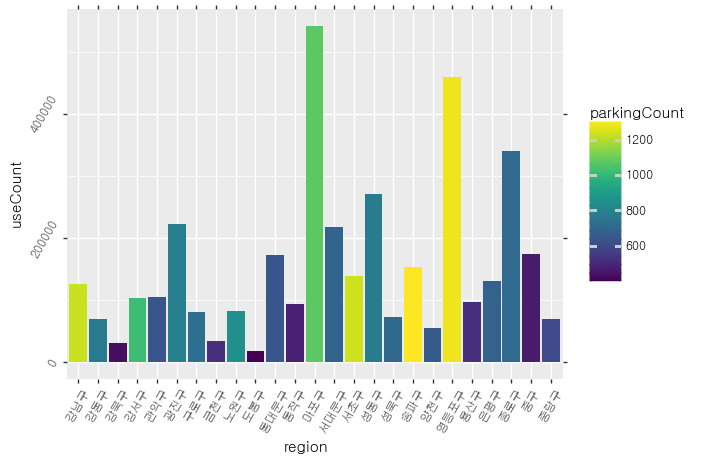

<ggplot: (-9223372036792063728)>

In [0]:
(ggplot(num_use) + aes(x='region', y='useCount', fill='parkingCount')
                 + geom_bar(stat='identity', position='dodge')
                 + theme(text = element_text(family='gulim'), axis_text = element_text(rotation=60))
 )

## 거치대 대비 이용률
- 수요와 공급을 재조정할 필요가 있다. 
1. 수요 >공급 : 종로구,광진구
2. 수요 <공급 : 서초구, 강남구
3. 수요 ~ 공급 : 마포구, 영등포구
4. 수요 공급 모두 낮은 구 : 강북구,도봉구,금천구

## 시계열 데이터 보기 

In [0]:
bike_stat = pd.read_csv('D:/dev/dataAnaysis project/sharedbike/seoul bike/bike_stat.csv', encoding='cp949')

In [0]:
bike_stat = bike_stat.apply(lambda x: x.str.strip("'") if x.dtype == np.dtype('object') else x)

In [0]:
bike_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6271127 entries, 0 to 6271126
Data columns (total 11 columns):
자전거번호      object
대여일시       object
대여대여소번호    object
대여대여소      object
대여거치대      int64
반납일시       object
반납대여소번호    object
반납대여소      object
반납거치대      int64
이용시간(분)    int64
이용거리(M)    int64
dtypes: int64(4), object(7)
memory usage: 526.3+ MB


In [0]:
bike_stat.rename(columns={'자전거번호': 'bikeNo','대여일시': 'rentdate',
                          '대여대여소번호':'number',
                          '대여대여소':'rentplace',
                          '대여거치대': 'rentspot',
                          '반납일시': 'returndate',
                          '반납대여소번호': 'returnNo',
                          '반납대여소': 'returnplace',
                          '반납거치대': 'returnspot',
                          '이용시간(분)':'useTime',
                          '이용거리(M)':'distance'}, inplace=True)

In [0]:
bike_stat.head(50)

,bikeNo,rentdate,number,rentplace,rentspot,returndate,returnNo,returnplace,returnspot,useTime,distance
0,SPB-03589,2017-06-01 00:00:15,244,영등포삼환아파트 앞,5,2017-06-01 00:21:52,252,보라매역4번출구,2,21,5150
1,SPB-03229,2017-06-01 00:00:18,700,KB국민은행 염창역 지점 앞,17,2017-06-01 00:35:12,1123,공암나루근린공원 관리사무소옆,2,34,4820
2,SPB-05391,2017-06-01 00:00:21,1606,태릉입구역 3번출구,1,2017-06-01 00:28:20,1623,노원 구민회관,16,27,3170
3,SPB-04604,2017-06-01 00:00:29,1606,태릉입구역 3번출구,3,2017-06-01 00:28:45,1623,노원 구민회관,13,28,3170
4,SPB-00816,2017-06-01 00:00:29,419,홈플러스 앞,1,2017-06-01 00:35:54,926,불광역 8번출구,8,35,6240
5,SPB-02183,2017-06-01 00:00:30,568,청계8가사거리 부근,10,2017-06-01 00:04:48,378,청계7가 사거리,3,4,790
6,SPB-05779,2017-06-01 00:00:52,179,가좌역 4번출구 앞,7,2017-06-01 00:34:54,117,홍은사거리,3,33,4280
7,SPB-04687,2017-06-01 00:00:56,330,청계천 한빛광장,4,2017-06-01 00:22:57,358,성대입구 사거리,2,21,3340
8,SPB-04510,2017-06-01 00:01:03,195,모래내고가차도,9,2017-06-01 00:13:39,191,정명학원,9,12,1860
9,SPB-01192,2017-06-01 00:01:11,113,홍대입구역 2번출구 앞,4,2017-06-01 00:09:47,102,망원역 1번출구 앞,20,8,1470


In [0]:
bike_stat['number'].value_counts().tail(10)
# 여기서 데이터가 대여소번호가 잘 매칭되지 않은 곳이 있는것을 알 수 있다. 

1675              104
2270               73
2382               57
2287               51
1040               47
2286               43
위트콤공장              39
2288               26
중랑정비팀test 1005     22
946                 2
Name: number, dtype: int64

In [0]:
# 대여량이 많은 상위 10개 대여소
bike_stat['rentplace'].value_counts().head(10)

 여의나루역 1번출구 앞               57983
 홍대입구역 2번출구 앞               44372
 뚝섬유원지역 1번출구 앞              42137
 마포구민체육센터 앞                 27204
 롯데월드타워(잠실역2번출구 쪽)          27057
 봉림교 교통섬                    26296
 고속터미널역 8-1번, 8-2번 출구 사이    24646
 신도림역 1번 출구 앞               23095
 합정역 7번출구 앞                 23056
 성대입구 사거리                   22917
Name: rentplace, dtype: int64

In [0]:
# 반납량이 많은 상위 10 개 반납소
bike_stat['returnplace'].value_counts().head(10)

 여의나루역 1번출구 앞               55944
 홍대입구역 2번출구 앞               53876
 뚝섬유원지역 1번출구 앞              48855
 마포구민체육센터 앞                 33287
 CJ 드림시티                    27806
 봉림교 교통섬                    26466
 고속터미널역 8-1번, 8-2번 출구 사이    26360
 롯데월드타워(잠실역2번출구 쪽)          26029
 군자역 7번출구 베스트샵 앞            24957
 성대입구 사거리                   23301
Name: returnplace, dtype: int64

## 대여량과 반납량을 확인해 본 결과 
- 여의나루역 1번출구, 뚝섬유원지역 1번출구, 홍대입구역 2번출구, 마포구민체육센터앞은 반납과 대여가 모두 상위 10위권 안에 드는 것을 확인가능. 

In [0]:
# 평균 이동거리가 긴 상위 대여소
# 동작역 5번출구, 개화동 상사마을 종점 버스 정류장등이 이동거리가 긴것을 알 수 있다. 
bike_stat.groupby(['rentplace'])['distance'].mean().reset_index().sort_values(by='distance', ascending=False).head(10)

,rentplace,distance
89,강일동 에너지 마루,9797.872340
337,독산주공 14단지 버스정류소,9583.414634
1176,한남나들목 입구,9052.747253
357,동작역 5번출구 동작주차공원,8455.447103
334,독산보도육교 앞 자전거 보관소,8046.507353
323,도봉산광역환승센터앞,8015.402477
1243,흑석역 1번출구,7916.513497
1234,황금내근린공원,7863.234075
511,베르가모앞,7747.316962
917,옥수역 3번출구,7730.266689


In [0]:
# 평균 이용시간이 많은 상위 대여소
# 동작역 5번출구,서울숲 관리사무소, 고터 8-1, 8-2 출구사이가 사용시간이 긴 것을 확인할 수 있다. 
bike_stat.groupby(['rentplace'])['useTime'].mean().reset_index().sort_values(by='useTime', ascending=False).head()

,rentplace,useTime
357,동작역 5번출구 동작주차공원,62.421285
652,서울숲 관리사무소,58.893485
653,서울숲 남문 버스정류소 옆,56.337524
119,"고속터미널역 8-1번, 8-2번 출구 사이",54.774933
1176,한남나들목 입구,53.942163


In [0]:
# 평균 이용시간이 적은 상위 대여소
# 상암센터 정비실, 위트콤공장이 10분 내외로 이용시간이 적었다. 
bike_stat.groupby(['rentplace'])['useTime'].mean().reset_index().sort_values(by='useTime', ascending=True).head()

,rentplace,useTime
888,영남주차장,3.000000
1261,상암센터 정비실,10.017241
1275,위트콤공장,12.769231
525,봉원고가차도 밑,13.535485
697,성균관대 E하우스 앞,14.170140


In [0]:
# 날짜와 시간이 object 타입이다.
# 연, 월, 일, 시, 분, 초, 요일 등의 정보를 가져오기 위해 데이터의 타입을 변경한다.
bike_stat['rentdate'] = pd.to_datetime(bike_stat['rentdate'])
bike_stat['returndate'] = pd.to_datetime(bike_stat['returndate'])
bike_stat.dtypes

bikeNo                 object
rentdate       datetime64[ns]
number                 object
rentplace              object
rentspot                int64
returndate     datetime64[ns]
returnNo               object
returnplace            object
returnspot              int64
useTime                 int64
distance                int64
dtype: object

In [0]:
bike_stat['rentymd'] = bike_stat['rentdate'].dt.date
bike_stat['returnymd'] = bike_stat['returndate'].dt.date
bike_stat['rentyear'] = bike_stat['rentdate'].dt.year
bike_stat['rentmonth'] = bike_stat['rentdate'].dt.month
bike_stat['rentday'] = bike_stat['rentdate'].dt.day
bike_stat['renthour'] = bike_stat['rentdate'].dt.hour
bike_stat['rentminute'] = bike_stat['rentdate'].dt.minute
bike_stat['rentweek'] = bike_stat['rentdate'].dt.dayofweek
bike_stat.columns

Index(['bikeNo', 'rentdate', 'number', 'rentplace', 'rentspot', 'returndate',
       'returnNo', 'returnplace', 'returnspot', 'useTime', 'distance',
       'rentymd', 'returnymd', 'rentyear', 'rentmonth', 'rentday', 'renthour',
       'rentminute', 'rentweek'],
      dtype='object')

In [0]:
bike_stat['returnymd'] = bike_stat['returndate'].dt.date
bike_stat['returnyear'] = bike_stat['returndate'].dt.year
bike_stat['returnmonth'] = bike_stat['returndate'].dt.month
bike_stat['returnday'] = bike_stat['returndate'].dt.day
bike_stat['returnhour'] = bike_stat['returndate'].dt.hour
bike_stat['returnminute'] = bike_stat['returndate'].dt.minute
bike_stat['returnweek'] = bike_stat['returndate'].dt.dayofweek
bike_stat.columns

Index(['bikeNo', 'rentdate', 'number', 'rentplace', 'rentspot', 'returndate',
       'returnNo', 'returnplace', 'returnspot', 'useTime', 'distance',
       'rentymd', 'returnymd', 'rentyear', 'rentmonth', 'rentday', 'renthour',
       'rentminute', 'rentweek', 'returnyear', 'returnmonth', 'returnday',
       'returnhour', 'returnminute', 'returnweek'],
      dtype='object')

In [0]:
bike_stat.head()

,bikeNo,rentdate,number,rentplace,rentspot,returndate,returnNo,returnplace,returnspot,useTime,...,rentday,renthour,rentminute,rentweek,returnyear,returnmonth,returnday,returnhour,returnminute,returnweek
0,SPB-03589,2017-06-01 00:00:15,244,영등포삼환아파트 앞,5,2017-06-01 00:21:52,252,보라매역4번출구,2,21,...,1,0,0,3,2017,6,1,0,21,3
1,SPB-03229,2017-06-01 00:00:18,700,KB국민은행 염창역 지점 앞,17,2017-06-01 00:35:12,1123,공암나루근린공원 관리사무소옆,2,34,...,1,0,0,3,2017,6,1,0,35,3
2,SPB-05391,2017-06-01 00:00:21,1606,태릉입구역 3번출구,1,2017-06-01 00:28:20,1623,노원 구민회관,16,27,...,1,0,0,3,2017,6,1,0,28,3
3,SPB-04604,2017-06-01 00:00:29,1606,태릉입구역 3번출구,3,2017-06-01 00:28:45,1623,노원 구민회관,13,28,...,1,0,0,3,2017,6,1,0,28,3
4,SPB-00816,2017-06-01 00:00:29,419,홈플러스 앞,1,2017-06-01 00:35:54,926,불광역 8번출구,8,35,...,1,0,0,3,2017,6,1,0,35,3


In [0]:
bike_stat.isnull().sum()

bikeNo          0
rentdate        0
number          0
rentplace       0
rentspot        0
returndate      0
returnNo        0
returnplace     0
returnspot      0
useTime         0
distance        0
rentymd         0
returnymd       0
rentyear        0
rentmonth       0
rentday         0
renthour        0
rentminute      0
rentweek        0
returnyear      0
returnmonth     0
returnday       0
returnhour      0
returnminute    0
returnweek      0
dtype: int64

In [0]:
bike_stat.sort_values('rentmonth')

,bikeNo,rentdate,number,rentplace,rentspot,returndate,returnNo,returnplace,returnspot,useTime,...,rentday,renthour,rentminute,rentweek,returnyear,returnmonth,returnday,returnhour,returnminute,returnweek
3979582,SPB-11404,2018-01-21 14:31:38,1404,동일로 지하차도,1,2018-01-21 14:43:07,1448,코스트코 상봉점,2,11,...,21,14,31,6,2018,1,21,14,43,6
3964973,SPB-11379,2018-01-19 09:02:23,635,시조사 앞 (청량고정문 옆),11,2018-01-19 09:12:35,615,용두동 레미안허브리츠아파트 앞,20,9,...,19,9,2,4,2018,1,19,9,12,4
3964974,SPB-04472,2018-01-19 09:02:24,302,경복궁역 4번출구 뒤,9,2018-01-19 09:11:35,327,낙원상가 옆,10,8,...,19,9,2,4,2018,1,19,9,11,4
3964975,SPB-06693,2018-01-19 09:02:25,1936,개봉역 1번 출구 자전거보관서쪽,4,2018-01-19 09:21:24,1834,월드메르디앙 벤처센터 2차,1,18,...,19,9,2,4,2018,1,19,9,21,4
3964976,SPB-07434,2018-01-19 09:02:28,2274,양재시민의숲역 3번출구,7,2018-01-19 09:06:38,2273,일동제약 사거리,3,3,...,19,9,2,4,2018,1,19,9,6,4
3964977,SPB-12779,2018-01-19 09:02:41,2252,하이브랜드 앞,3,2018-01-19 09:08:15,2255,시민의숲역 1번출구 옆,3,5,...,19,9,2,4,2018,1,19,9,8,4
3964978,SPB-07366,2018-01-19 09:02:45,130,신촌역(2호선) 7번출구 앞,10,2018-01-19 09:07:47,124,서강대 정문 건너편,4,4,...,19,9,2,4,2018,1,19,9,7,4
3964979,SPB-04139,2018-01-19 09:03:10,327,낙원상가 옆,1,2018-01-19 09:08:38,331,을지로2가 사거리 북측,3,5,...,19,9,3,4,2018,1,19,9,8,4
3964980,SPB-08435,2018-01-19 09:03:14,601,용신동주민센터,1,2018-01-19 09:14:21,631,답십리역 1번출구,3,10,...,19,9,3,4,2018,1,19,9,14,4
3964981,SPB-01349,2018-01-19 09:03:27,128,신촌역(2호선) 1번출구 옆,11,2018-01-19 09:07:58,140,이화여대 후문,17,4,...,19,9,3,4,2018,1,19,9,7,4


In [0]:
bike_stat_month_1 = bike_stat['rentmonth'].value_counts().reset_index()
bike_stat_month_1.columns = ['month', 'count']

In [0]:
bike_stat_month_1 = bike_stat_month_1.sort_values('month')
bike_stat_month_1['대여반납'] = 'rent'
print(bike_stat_month_1.shape)

(12, 3)


In [0]:
bike_stat_month_2 = bike_stat['returnmonth'].value_counts().reset_index()
bike_stat_month_2.columns = ['month', 'count']
bike_stat_month_2 = bike_stat_month_2.sort_values('month')
bike_stat_month_2['대여반납'] = 'return'
bike_stat_month_2.shape

(12, 3)

In [0]:
bike_stat_month = pd.concat([bike_stat_month_1, bike_stat_month_2])
bike_stat_month.shape

(24, 3)

In [0]:
bike_stat_month

,month,count,대여반납
11,1,161859,rent
10,2,166337,rent
7,3,456538,rent
3,4,677878,rent
0,5,951446,rent
5,6,532503,rent
8,7,384514,rent
4,8,534397,rent
1,9,880529,rent
2,10,852503,rent


In [0]:
# pivot_table을 활용해서 
bike_stat_month_pivot =  bike_stat_month.pivot_table(index=['month'],
                                       columns=['대여반납'], 
                                       values='count', aggfunc=sum)
bike_stat_month_pivot

대여반납,rent,return
month,,
1,161859,161959
2,166337,166372
3,456538,456123
4,677878,677636
5,951446,951349
6,532503,532648
7,384514,384842
8,534397,534094
9,880529,880306


## 월별 대여반납 확인(시각화)

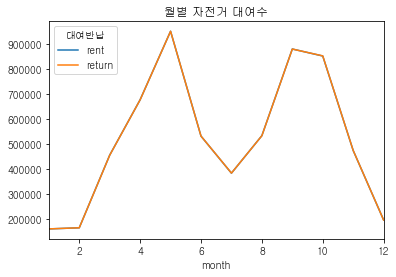

In [0]:
bike_stat_month_pivot.plot(title='월별 자전거 대여수', rot=0)

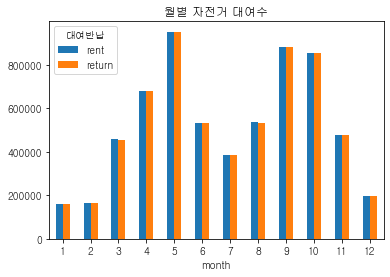

In [0]:
bike_stat_month_pivot.plot.bar(title='월별 자전거 대여수', rot=0)

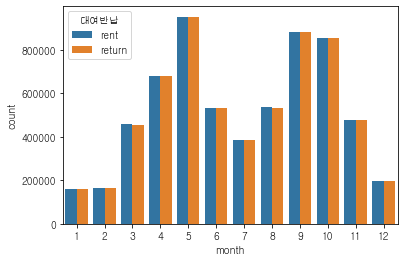

In [0]:
sn.barplot(data=bike_stat_month, x='month', y='count', hue='대여반납')

In [0]:
#요일별 대여반납 확인하기
bike_stat_day_1 = bike_stat['rentday'].value_counts().reset_index()
bike_stat_day_1.columns = ['day', 'count']

bike_stat_day_1 = bike_stat_day_1.sort_values('day')
bike_stat_day_1['대여반납'] = 'rent'
bike_stat_day_1.shape

(31, 3)

In [0]:
bike_stat_day_2 = bike_stat['returnday'].value_counts().reset_index()
bike_stat_day_2.columns = ['day', 'count']

bike_stat_day_2 = bike_stat_day_2.sort_values('day')
bike_stat_day_2['대여반납'] = 'return'
bike_stat_day_2.shape

(31, 3)

In [0]:
bike_stat_day = pd.concat([bike_stat_day_1,bike_stat_day_2])
bike_stat_day.shape

(62, 3)

In [0]:
bike_stat_day.head()

,day,count,대여반납
16,1,198715,rent
25,2,182954,rent
15,3,203256,rent
14,4,204183,rent
27,5,179512,rent


In [0]:
# 피벗 테이블 활용해서 만들기 
bike_stat_day_pivot = bike_stat_day.pivot_table(index=['day'],
                                               columns=['대여반납'],
                                               values='count', aggfunc=sum)
bike_stat_day_pivot

대여반납,rent,return
day,,
1,198715,200295
2,182954,182423
3,203256,203794
4,204183,203763
5,179512,179597
6,145071,146036
7,205728,204663
8,208716,208556
9,230032,230351


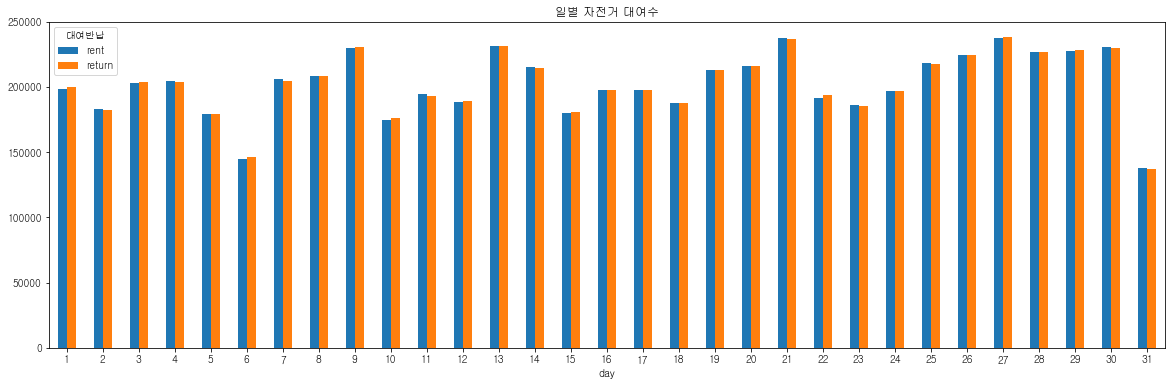

In [0]:
bike_stat_day_pivot.plot.bar(title='일별 자전거 대여수', rot=0, figsize=(20, 6))

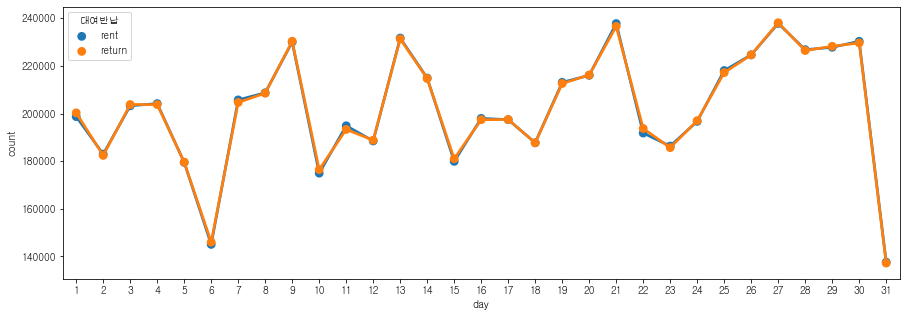

In [0]:
plt.figure(figsize=(15, 5))
sn.pointplot(data=bike_stat_day, x='day', y='count', hue='대여반납')

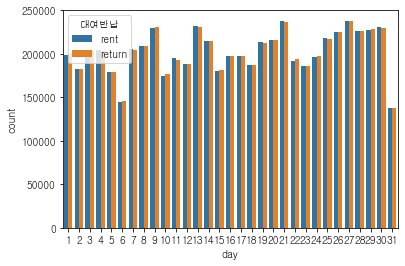

In [0]:
sn.barplot(data=bike_stat_day, x='day', y='count', hue='대여반납')

## 일별로 대여반납양을 확인해본 결과 
- 잘 모르겠다. 
- 다음으로 년월일로 나누어서 확인을 해보자. 

In [0]:
bike_stat_ymd_1 = bike_stat['rentymd'].value_counts().reset_index()
bike_stat_ymd_1.columns = ['ymd', 'count']

In [0]:
bike_stat_ymd_1 = bike_stat_ymd_1.sort_values('ymd')
bike_stat_ymd_1['대여반납'] = 'rent'
bike_stat_ymd_1.shape

(365, 3)

In [0]:
bike_stat_ymd_2 = bike_stat['returnymd'].value_counts().reset_index()
bike_stat_ymd_2.columns = ['ymd','count']

In [0]:
bike_stat_ymd_2 = bike_stat_ymd_2.sort_values('ymd')
bike_stat_ymd_2['대여반납'] = 'return'
bike_stat_ymd_2.shape

(366, 3)

In [0]:
bike_stat_ymd = pd.concat([bike_stat_ymd_1, bike_stat_ymd_2])
bike_stat_ymd.shape

(731, 3)

In [0]:
bike_stat_ymd.head()

,ymd,count,대여반납
173,2017-06-01,17515,rent
228,2017-06-02,11847,rent
147,2017-06-03,19241,rent
148,2017-06-04,19135,rent
140,2017-06-05,19287,rent


## 시간별 분류로 나누어보자.
- 시간데이터로 표현하기 위해 타입을 바꿔준다. 

In [0]:
bike_stat_ymd["ymd"] = pd.to_datetime(bike_stat_ymd["ymd"])
bike_stat_ymd["yymmdd"] = bike_stat_ymd["ymd"].dt.date

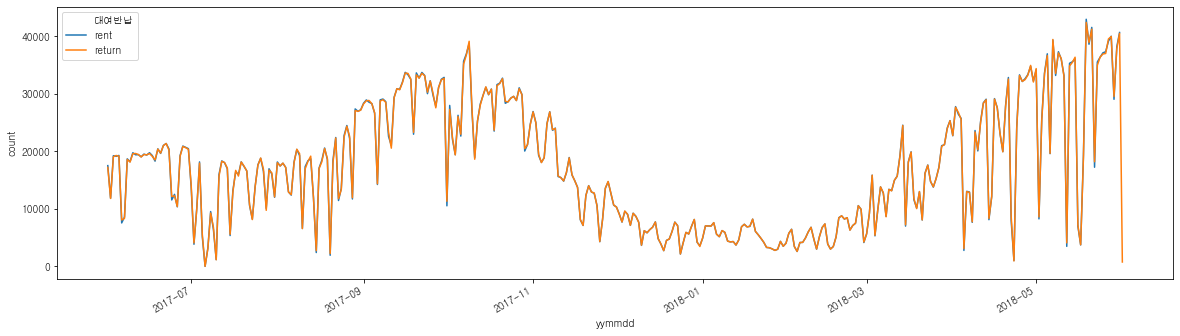

In [0]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=30, ha='right')
sn.lineplot(data=bike_stat_ymd, x='yymmdd', y='count', hue='대여반납')

In [0]:
# 슬라이싱으로 최근 데이터를 불러오기 위해 날짜 기준으로 정렬되도록 한다.
bike_stat_ymd = bike_stat_ymd.sort_values(by='ymd')
bike_stat_ymd.head()

,ymd,count,대여반납,yymmdd
173,2017-06-01,17515,rent,2017-06-01
176,2017-06-01,17198,return,2017-06-01
229,2017-06-02,11812,return,2017-06-02
228,2017-06-02,11847,rent,2017-06-02
148,2017-06-03,19064,return,2017-06-03


In [0]:
bike_stat_dow_1 = bike_stat['rentweek'].value_counts().reset_index()
bike_stat_dow_1.columns = ['dayofweek', 'count']
bike_stat_dow_1 = bike_stat_dow_1.sort_values('dayofweek')
bike_stat_dow_1['대여반납'] = 'rent'
bike_stat_dow_1.shape

(7, 3)

In [0]:
bike_stat_dow_2 = bike_stat['returnweek'].value_counts().reset_index()
bike_stat_dow_2.columns = ['dayofweek', 'count']
bike_stat_dow_2 = bike_stat_dow_2.sort_values('dayofweek')
bike_stat_dow_2['대여반납'] = 'return'
bike_stat_dow_2.shape

(7, 3)

In [0]:
bike_stat_dow = pd.concat([bike_stat_dow_1, bike_stat_dow_2]).reindex()
bike_stat_dow.shape

(14, 3)

In [0]:
bike_stat_dow.head()

,dayofweek,count,대여반납
3,0,910162,rent
1,1,935486,rent
5,2,886935,rent
2,3,915233,rent
0,4,940997,rent


In [0]:
# 요일을 알아보기 편하도록 맵핑을 해주자 
weekday_map = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}

In [0]:
bike_stat_dow['weekday'] = bike_stat_dow['dayofweek'].apply(lamda x : weekday_map[x])
bike_stat_dow[['dayofweek', 'weekday']].head()

SyntaxError: invalid syntax (<ipython-input-323-e55bfbb78627>, line 1)

## 시간대별 대여 반납량을 알아보자. 

In [0]:
bike_stat_hour_1 = bike_stat['renthour'].value_counts().reset_index()
bike_stat_hour_1.columns = ['hour', 'count']
bike_stat_hour_1 = bike_stat_hour_1.sort_values('hour')
bike_stat_hour_1['대여반납'] = 'rent'
bike_stat_hour_1.head()

,hour,count,대여반납
16,0,179855,rent
18,1,137038,rent
19,2,94263,rent
21,3,61239,rent
23,4,39467,rent


In [0]:
bike_stat_hour_2 = bike_stat['returnhour'].value_counts().reset_index()
bike_stat_hour_2.columns = ['hour', 'count']
bike_stat_hour_2 = bike_stat_hour_2.sort_values('hour')
bike_stat_hour_2['대여반납'] = 'return'
bike_stat_hour_2.head()

,hour,count,대여반납
14,0,208027,return
18,1,158392,return
19,2,113190,return
20,3,72692,return
22,4,49244,return


In [0]:
bike_stat_hour = pd.concat([bike_stat_hour_1, bike_stat_hour_2])
bike_stat_hour.head()

,hour,count,대여반납
16,0,179855,rent
18,1,137038,rent
19,2,94263,rent
21,3,61239,rent
23,4,39467,rent


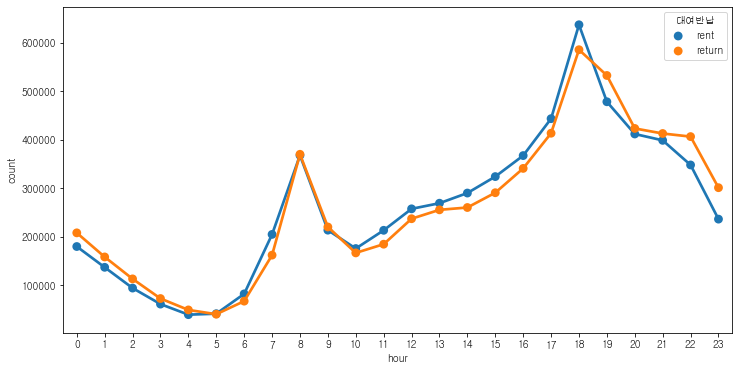

In [0]:
plt.figure(figsize=(12,6))
sn.pointplot(data=bike_stat_hour, x='hour', y='count', hue='대여반납')

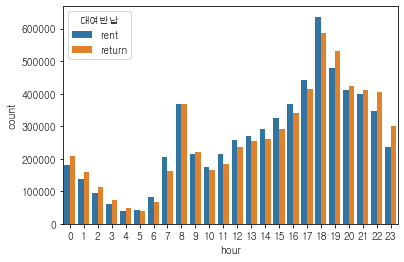

In [0]:
sn.barplot(data=bike_stat_hour, x = 'hour', y='count', hue='대여반납')

## 시간대별 분석결과 
- 오전에는 8시대에 대여/반납이 많으며, 오후시간대에는 18시에 대여/반납이 가장 많다.
- 오전 8시까지는 반납이 더 많고, 이때부터 대여가많아지다가 7시가 되면 다시 반납이 많아진다.

In [0]:
# 대여 분을 분석해서 대여와 반납을 확인해 본다. 
bike_stat_min_1 = bike_stat['rentminute'].value_counts().reset_index()
bike_stat_min_1.columns = ['minute', 'count']
bike_stat_min_1 = bike_stat_min_1.sort_values('minute')
bike_stat_min_1['대여반납'] = 'rent'
bike_stat_min_1.head()

,minute,count,대여반납
56,0,99690,rent
50,1,101241,rent
48,2,101905,rent
27,3,104498,rent
13,4,106792,rent


In [0]:
bike_stat_min_2 = bike_stat['returnminute'].value_counts().reset_index()
bike_stat_min_2.columns = ['minute', 'count']
bike_stat_min_2 = bike_stat_min_2.sort_values('minute')
bike_stat_min_2['대여반납'] = 'return'
bike_stat_min_2.head()

,minute,count,대여반납
38,0,103363,return
48,1,101094,return
49,2,100871,return
53,3,100069,return
56,4,99144,return


In [0]:
bike_stat_min = pd.concat([bike_stat_min_1, bike_stat_min_2])
bike_stat_min.head()

,minute,count,대여반납
56,0,99690,rent
50,1,101241,rent
48,2,101905,rent
27,3,104498,rent
13,4,106792,rent


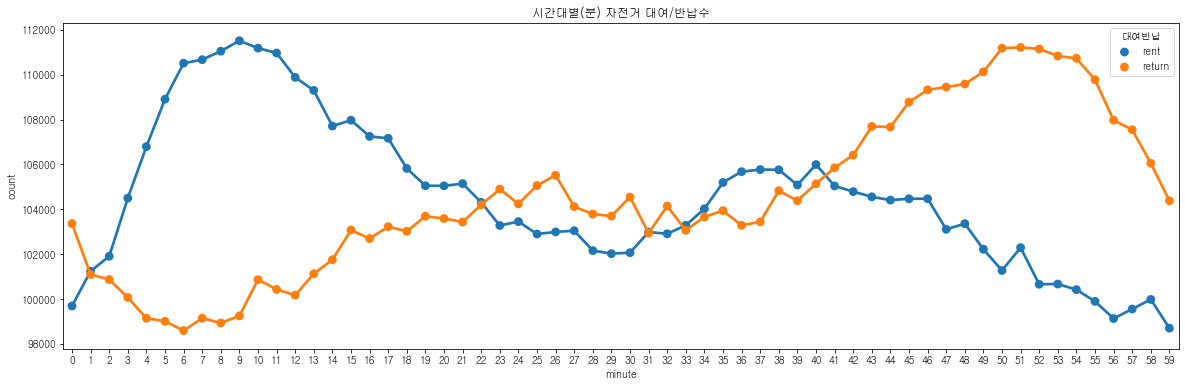

In [0]:
plt.figure(figsize=(20,6))
plt.title('시간대별(분) 자전거 대여/반납수')
sn.pointplot(data=bike_stat_min, x="minute", y="count", hue="대여반납")

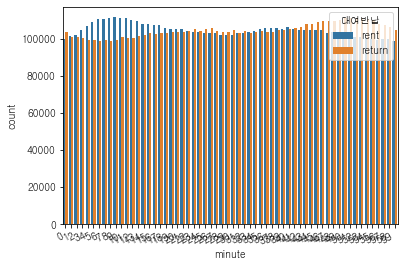

In [0]:
plt.xticks(rotation=30, ha='right')
sn.barplot(data=bike_stat_min, x="minute", y="count", hue="대여반납")

대여와 반납이 비슷하게 이루어 지고 있으나, 20분까지 대여가 높고, 40~60사이가 반납이 높다. 

In [0]:
# 대여와 반납이 같은 곳에서 이루어 지고 있는지 확인한다. 
bike_stat['같은대여반납소'] = bike_stat['rentplace'] == bike_stat['returnplace']

bike_stat_loca_diff = bike_stat['같은대여반납소'].value_counts().reset_index()
bike_stat_loca_diff.columns = ['일치여부', '대여반납수']

In [0]:
# 대여반납소별 일치여부로 대여반납수가 얼마나 차이나는지 확인.
location_diff_ratio = bike_stat_loca_diff['대여반납수'][0]/bike_stat_loca_diff['대여반납수'][1]
print(f'같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 {location_diff_ratio:.2f}배 많다.')

같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 7.37배 많다.


In [0]:
bike_stat_loca_diff

,일치여부,대여반납수
0,False,5521806
1,True,749321


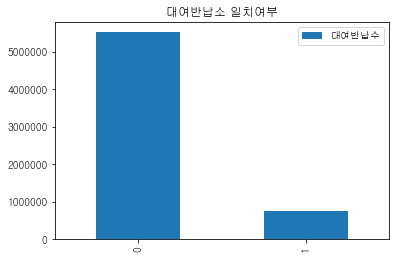

In [0]:
bike_stat_loca_diff.plot.bar(title="대여반납소 일치여부")

In [0]:
bike_stat_same_loc = bike_stat.loc[bike_stat['같은대여반납소'] == True]
bike_stat_same_loc.head()

,bikeNo,rentdate,number,rentplace,rentspot,returndate,returnNo,returnplace,returnspot,useTime,...,renthour,rentminute,rentweek,returnyear,returnmonth,returnday,returnhour,returnminute,returnweek,같은대여반납소
51,SPB-05680,2017-06-01 00:05:35,264,교보생명보험 앞,1,2017-06-01 00:17:40,264,교보생명보험 앞,7,11,...,0,5,3,2017,6,1,0,17,3,True
81,SPB-03950,2017-06-01 00:08:30,207,여의나루역 1번출구 앞,14,2017-06-01 01:13:54,207,여의나루역 1번출구 앞,13,65,...,0,8,3,2017,6,1,1,13,3,True
84,SPB-04182,2017-06-01 00:08:41,207,여의나루역 1번출구 앞,13,2017-06-01 01:14:09,207,여의나루역 1번출구 앞,12,65,...,0,8,3,2017,6,1,1,14,3,True
96,SPB-02369,2017-06-01 00:10:08,152,마포구민체육센터 앞,5,2017-06-01 01:13:03,152,마포구민체육센터 앞,4,62,...,0,10,3,2017,6,1,1,13,3,True
99,SPB-00697,2017-06-01 00:10:21,1519,세븐일레븐 수유장미원점 앞,8,2017-06-01 00:35:31,1519,세븐일레븐 수유장미원점 앞,8,24,...,0,10,3,2017,6,1,0,35,3,True


In [0]:
bike_stat_same_loc['distance']

51          1540
81          8250
84          8130
96          1540
99          2920
           ...  
6271033    10880
6271036      150
6271042    12590
6271075     4720
6271093    11090
Name: distance, Length: 749321, dtype: int64

In [0]:
bike_stat_same_loc['rentplace'].value_counts().head(30)

 여의나루역 1번출구 앞               18480
 뚝섬유원지역 1번출구 앞              13168
 월드컵공원                       7096
 마포구민체육센터 앞                  6681
 서울숲역 4번 출구 옆                6302
 봉림교 교통섬                     5675
 고속터미널역 8-1번, 8-2번 출구 사이     5497
 옥수역 3번출구                    4777
 노들역 1번출구                    4302
 CJ 드림시티                     4189
 올림픽공원역 1번출구 앞               4093
 외국어대 정문 앞                   3901
 청계천 생태교실 앞                  3882
 당산육갑문                       3842
 도림천 신화교                     3705
 한신16차아파트 119동 앞             3313
 공암나루근린공원 관리사무소옆             3296
 홍대입구역 2번출구 앞                3250
 흑석역 1번출구                    3226
 황금내근린공원                     3092
 새절역 2번출구                    2989
 롯데월드타워(잠실역2번출구 쪽)           2988
 오목교역 7번출구 앞                 2952
 과기대 입구(우)                   2840
 홍연2교옆                       2762
 월드컵경기장역 3번출구 옆              2726
 대림경동아파트앞                    2708
 현대고등학교 건너편                  2576
 망원2빗물펌프장 앞                  2539
 안암로터리 버스정류장 앞

## 대여 /반납 일치여부에 따른 사용시간 분석

In [0]:
# 같은 대여반납소
same_loc_mean_time = bike_stat_same_loc['useTime'].mean()
print('같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간: ', same_loc_mean_time)

같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간:  54.40978032111739


In [0]:
bike_stat_same_mean = bike_stat_same_loc.groupby(['rentplace', 'number', 'returnplace'])['useTime'].mean().reset_index()
bike_stat_same_count = bike_stat_same_loc.groupby(['rentplace', 'number', 'returnplace']).size().reset_index()
bike_stat_same_count.columns = ['rentplace', 'number', 'returnplace', 'useCount']
bike_stat_same_loc2 = bike_stat_same_mean.merge(bike_stat_same_count, left_on = ['rentplace', 'number','returnplace'], 
                                          right_on= ['rentplace', 'number', 'returnplace'])

In [0]:
bike_stat_same_loc2.head()

,rentplace,number,returnplace,useTime,useCount
0,,중랑정비팀test 1005,,48.200000,5
1,강동구청 앞,1024,강동구청 앞,48.459770,174
2,둔촌역 3번 출입구,1050,둔촌역 3번 출입구,57.978022,182
3,(구)신한은행 중랑교지점,1442,(구)신한은행 중랑교지점,47.186047,129
4,(구)합정동 주민센터,101,(구)합정동 주민센터,47.551966,712


In [0]:
bike_stat_same_loc2.sort_values(by='useCount', ascending=False).head(10)

,rentplace,number,returnplace,useTime,useCount
860,여의나루역 1번출구 앞,207,여의나루역 1번출구 앞,68.530574,18480
375,뚝섬유원지역 1번출구 앞,502,뚝섬유원지역 1번출구 앞,60.071081,13168
957,월드컵공원,186,월드컵공원,59.492108,7096
410,마포구민체육센터 앞,152,마포구민체육센터 앞,56.681485,6681
655,서울숲역 4번 출구 옆,511,서울숲역 4번 출구 옆,65.147414,6302
524,봉림교 교통섬,2102,봉림교 교통섬,59.961586,5675
119,"고속터미널역 8-1번, 8-2번 출구 사이",2219,"고속터미널역 8-1번, 8-2번 출구 사이",78.711479,5497
917,옥수역 3번출구,565,옥수역 3번출구,55.105506,4777
257,노들역 1번출구,2002,노들역 1번출구,64.163412,4302
7,CJ 드림시티,907,CJ 드림시티,67.635951,4189


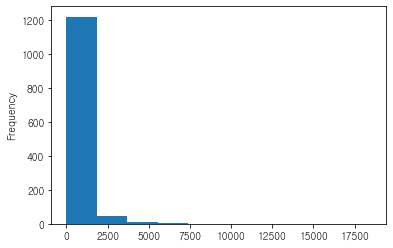

In [0]:
bike_stat_same_loc2['useCount'].plot.hist()

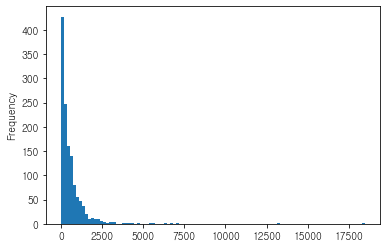

In [0]:
bike_stat_same_loc2['useCount'].plot.hist(bins=100)

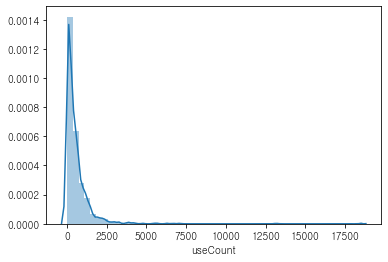

In [0]:
sn.distplot(bike_stat_same_loc2['useCount'])

## 대여와 반납의 장소가 다른 경우 

In [0]:
bike_stat_diff_loc = bike_stat.loc[bike_stat['같은대여반납소'] ==False]
bike_stat_diff_loc.shape

(5521806, 26)

In [0]:
diff_loc_mean_time = bike_stat_diff_loc['useTime'].mean()
print('다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', bike_stat_diff_loc['useTime'].mean())

bike_stat_diff_mean = bike_stat_diff_loc.groupby(
        ['rentplace', 'returnplace'])['useTime'].mean().reset_index()
bike_stat_diff_count = bike_stat_diff_loc.groupby(['rentplace', 'returnplace']).size().reset_index()

bike_stat_diff_count.columns = ['rentplace', 'returnplace', 'useCount']
bike_stat_diff_loc2 = bike_stat_diff_mean.merge(bike_stat_diff_count, left_on=['rentplace', 'returnplace'],
                                          right_on = ['rentplace', 'returnplace'])

다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  25.372923460186758


In [0]:
bike_stat_diff_loc2.sort_values(by='useCount', ascending=False).head(10)

,rentplace,returnplace,useTime,useCount
246124,하늘채코오롱아파트 건너편,홍대입구역 2번출구 앞,8.715338,6246
258921,홍대입구역 2번출구 앞,하늘채코오롱아파트 건너편,12.725458,4910
209984,일진아이윌아파트 옆,홍대입구역 2번출구 앞,8.998069,4142
258860,홍대입구역 2번출구 앞,일진아이윌아파트 옆,9.549496,3869
214056,장승배기역 5번출구,노량진역 5번출구,8.146646,3846
210418,자양나들목,뚝섬유원지역 1번출구 앞,9.784972,3753
146931,성수역 2번출구 앞,성동세무서 건너편,5.365901,3613
143162,성대입구 사거리,성균관대 E하우스 앞,10.153777,3336
58796,당산역 10번출구 앞,영등포삼환아파트 앞,11.116171,3228
186537,영등포삼환아파트 앞,당산역 10번출구 앞,9.567980,3148


In [0]:
rent_mean_time = same_loc_mean_time- diff_loc_mean_time
print(f'같은 곳에서 대여반납이 이루어지는 자전거의 이용시간이 다른 대여소의 대여반납 이용시간보다 {rent_mean_time:.2f}분 많다.')

같은 곳에서 대여반납이 이루어지는 자전거의 이용시간이 다른 대여소의 대여반납 이용시간보다 29.04분 많다.


## 해당 기간동안 가장 많이 이용된 자전거의 대여횟수 

In [0]:
bike_describe = bike_stat['bikeNo'].describe()

In [0]:
print('대여된 자전거수  : ', bike_describe[1])

대여된 자전거수  :  15629


In [0]:
print('대여왕 자전거  : ', bike_describe[2])

대여왕 자전거  :  SPB-05917


In [0]:
print('대여왕 자전거의 대여횟수: ', bike_describe[3])

대여왕 자전거의 대여횟수:  1032


In [0]:
bike_describe

count       6271127
unique        15629
top       SPB-05917
freq           1032
Name: bikeNo, dtype: object

In [0]:
bike_rent_counts = bike_stat['bikeNo'].value_counts().reset_index()
bike_rent_counts.columns = ['bikeNo', 'rentCount']

In [0]:
print('해당 기간동안 자전거 하나당 평균 대여 수:', bike_rent_counts['rentCount'].mean())
print('자전거 하나당 가장 많이 대여된 횟수:', bike_rent_counts['rentCount'].max())
print('자전거 하나당 가장 적게 대여된 횟수:', bike_rent_counts['rentCount'].min())

해당 기간동안 자전거 하나당 평균 대여 수: 401.2494081515132
자전거 하나당 가장 많이 대여된 횟수: 1032
자전거 하나당 가장 적게 대여된 횟수: 1


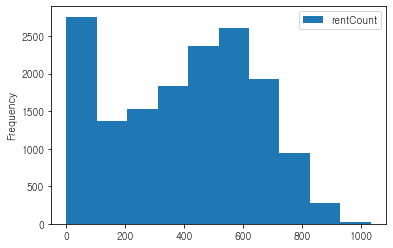

In [0]:
bike_rent_counts.plot.hist()

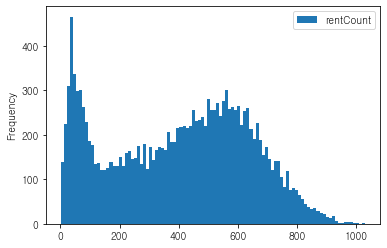

In [0]:
# bin의 갯수를 늘려서 그려본다.
bike_rent_counts.plot.hist(bins=100)

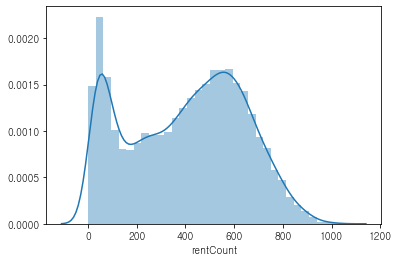

In [0]:
sn.distplot(bike_rent_counts["rentCount"])

In [0]:
# 가장 많이 대여된 자전거의 대여이력
most_bike_df = bike_stat.loc[bike_stat['bikeNo'] == bike_describe[2]]
most_bike_df.head()

,bikeNo,rentdate,number,rentplace,rentspot,returndate,returnNo,returnplace,returnspot,useTime,...,renthour,rentminute,rentweek,returnyear,returnmonth,returnday,returnhour,returnminute,returnweek,같은대여반납소
5878,SPB-05917,2017-06-01 13:06:53,915,증산역 4번출구,7,2017-06-01 13:13:11,194,증산교 앞,8,6,...,13,6,3,2017,6,1,13,13,3,False
5983,SPB-05917,2017-06-01 13:18:08,194,증산교 앞,8,2017-06-01 13:23:29,169,북가좌 삼거리,15,5,...,13,18,3,2017,6,1,13,23,3,False
13557,SPB-05917,2017-06-01 20:26:57,169,북가좌 삼거리,15,2017-06-01 20:52:21,146,마포역 1번출구 뒤,4,25,...,20,26,3,2017,6,1,20,52,3,False
14341,SPB-05917,2017-06-01 21:00:22,146,마포역 1번출구 뒤,4,2017-06-01 21:08:34,156,서울서부지방법원 앞,10,7,...,21,0,3,2017,6,1,21,8,3,False
24548,SPB-05917,2017-06-02 14:12:57,270,증권거래소후문교차로,7,2017-06-02 14:33:03,267,삼성화재 사옥 옆,5,19,...,14,12,4,2017,6,2,14,33,4,False


In [0]:
most_bike_df['rentplace'].value_counts()

 서강대 후문 옆         12
 봉림교 교통섬          11
 서강대 남문 옆         10
 여의나루역 1번출구 앞     10
 하늘채코오롱아파트 건너편     8
                  ..
 도림신협 앞            1
 상도역 1번출구          1
 청계8가사거리 부근        1
 뚝섬 유원지역           1
 어린이회관             1
Name: rentplace, Length: 452, dtype: int64

In [0]:
rent_station = most_bike_df['rentplace'].unique()
rent_station

array([' 증산역 4번출구', ' 증산교 앞', ' 북가좌 삼거리', ' 마포역 1번출구 뒤', ' 증권거래소후문교차로',
       ' 삼성화재 사옥 옆', ' 서교동 사거리', ' 신촌역(2호선) 6번출구 옆', ' 공덕역 2번출구',
       ' 신한은행 서교동금융센터점 앞', ' 홈플러스 앞', ' 연세로 명물길', ' 이대역 4번 출구', ' 임광빌딩 앞',
       ' KEB 하나은행 본점 앞', ' 종로구청 옆', ' 혜화동 로터리', ' 신세계백화점 본점 앞',
       ' 서울보증보험본사 앞', ' 성대입구 사거리', ' 세운스퀘어 앞', ' 종로4가 사거리', ' 대학로 마로니에공원',
       ' 맥스타일 앞', ' 낙원상가 옆', ' 탑골공원 앞', ' 광화문역 2번출구 앞', ' 청운초교 앞 삼거리',
       ' 동성중학교 앞', ' 티마크 호텔 앞', ' 청계천 한빛광장', ' 종각역 1번출구 앞', ' 선린인터넷 고등학교',
       ' 마장역 4번출구', ' 답십리초등학교 앞(현대시장 옆)', ' 서울시립대 정문 앞', ' 용두동 사거리',
       ' 휘봉고등학교 앞', ' 봉원고가차도 밑', ' 명물길 원형무대 앞', ' 합정역 5번출구 앞',
       ' 망원역 2번출구 앞', ' 망원역 1번출구 앞', ' 창천문화공원', ' 연희교차로 인근', ' 증산3교 앞',
       ' 홍연2교옆', ' 가재울 초등학교', ' 홍은사거리', ' CJ 드림시티', ' 녹번역 4번출구', ' 응암오거리',
       ' 이마트 은평점', ' 국민은행 연서지점', ' 연신내역 5번출구150M 아래', ' 여의도역 4번출구 옆',
       ' 아시아지하보도 2번 출구', ' 장승배기역2번출구뒷편쪽', ' 이촌1동 마을공원', ' 봉림교 교통섬',
       ' 도림천 신화교', ' 개봉푸르지오아파트 상가', ' 한국SGI 양천문화회관 앞', ' KT앞', ' 초원아파트 앞',
       ' 신

In [0]:
# 대여소명 앞에 들어간 공백을 제거합니다.
bike_move = []
for s in rent_station:
    bike_move.append(s.strip())
    
bike_move  

['증산역 4번출구',
 '증산교 앞',
 '북가좌 삼거리',
 '마포역 1번출구 뒤',
 '증권거래소후문교차로',
 '삼성화재 사옥 옆',
 '서교동 사거리',
 '신촌역(2호선) 6번출구 옆',
 '공덕역 2번출구',
 '신한은행 서교동금융센터점 앞',
 '홈플러스 앞',
 '연세로 명물길',
 '이대역 4번 출구',
 '임광빌딩 앞',
 'KEB 하나은행 본점 앞',
 '종로구청 옆',
 '혜화동 로터리',
 '신세계백화점 본점 앞',
 '서울보증보험본사 앞',
 '성대입구 사거리',
 '세운스퀘어 앞',
 '종로4가 사거리',
 '대학로 마로니에공원',
 '맥스타일 앞',
 '낙원상가 옆',
 '탑골공원 앞',
 '광화문역 2번출구 앞',
 '청운초교 앞 삼거리',
 '동성중학교 앞',
 '티마크 호텔 앞',
 '청계천 한빛광장',
 '종각역 1번출구 앞',
 '선린인터넷 고등학교',
 '마장역 4번출구',
 '답십리초등학교 앞(현대시장 옆)',
 '서울시립대 정문 앞',
 '용두동 사거리',
 '휘봉고등학교 앞',
 '봉원고가차도 밑',
 '명물길 원형무대 앞',
 '합정역 5번출구 앞',
 '망원역 2번출구 앞',
 '망원역 1번출구 앞',
 '창천문화공원',
 '연희교차로 인근',
 '증산3교 앞',
 '홍연2교옆',
 '가재울 초등학교',
 '홍은사거리',
 'CJ 드림시티',
 '녹번역 4번출구',
 '응암오거리',
 '이마트 은평점',
 '국민은행 연서지점',
 '연신내역 5번출구150M 아래',
 '여의도역 4번출구 옆',
 '아시아지하보도 2번 출구',
 '장승배기역2번출구뒷편쪽',
 '이촌1동 마을공원',
 '봉림교 교통섬',
 '도림천 신화교',
 '개봉푸르지오아파트 상가',
 '한국SGI 양천문화회관 앞',
 'KT앞',
 '초원아파트 앞',
 '신길역3번출구',
 '광흥창역 2번출구 앞',
 '서강대 남문 옆',
 '연세대 정문 건너편',
 'NH농협 신촌지점 앞',
 '독립문 어린이 공원',
 '시청역 1번출구 뒤',
 '서울역사

In [0]:
bike_move_df = pd.DataFrame(bike_move)
bike_move_df.columns = ['rentplace']
print(bike_move_df.shape)
bike_move_df.head()

(452, 1)


,rentplace
0,증산역 4번출구
1,증산교 앞
2,북가좌 삼거리
3,마포역 1번출구 뒤
4,증권거래소후문교차로


In [0]:
bike_move_df = bike_move_df.merge(data_d, left_on='rentplace', right_on='rentplace', how='left')
bike_move_df.shape

(452, 6)

In [0]:
bike_move_df.head()

,rentplace,region,number,latitude,longitude,parkingCount
0,증산역 4번출구,은평구,915,37.584381,126.909897,10.0
1,증산교 앞,서대문구,194,37.577316,126.902969,10.0
2,북가좌 삼거리,서대문구,169,37.573002,126.907799,15.0
3,마포역 1번출구 뒤,마포구,146,37.539936,126.945824,12.0
4,증권거래소후문교차로,영등포구,270,37.522343,126.927101,10.0


In [0]:
bike_move_df.loc[bike_move_df['latitude'].isnull()]

,rentplace,region,number,latitude,longitude,parkingCount
145,관악구 재활용센터,NaN,NaN,NaN,NaN,NaN
181,아차산역 사거리,NaN,NaN,NaN,NaN,NaN
435,장안동위더스빌옆,NaN,NaN,NaN,NaN,NaN


In [0]:
# 지도 표현을 위해 folium 을 import 한다.
# 데이터 프레임에서 위도와 경도의 평균값을 구한다. 이 값으로 지도의 중심이 될 좌표를 정한다.
# zoom_start는 지도를 얼마나 확대해서 볼것인지다.
# tiles는 지도의 스타일이다.
import folium

In [0]:
geo_df = bike_move_df
map = folium.Map(
    location = [geo_df['latitude'].mean(), geo_df['longitude'].mean()],
    zoom_start=12, tiles = 'Stamen Toner')

for n in geo_df.index:
    if geo_df.loc[n, 'latitude'] >0 and geo_df.loc[n, 'longitude'] >0:
        loc_name = geo_df.loc[n, 'rentplace']
        
        icon_color = 'red'
        folium.Circle(
            location = [geo_df.loc[n, 'latitude'], geo_df.loc[n, 'longitude']],
            popup = loc_name, 
            radius = 50, 
            color = icon_color,
            fill = True,
            fill_color = icon_color).add_to(map)
map